# Checkpoints - Part 1
### Checkpoint 1: Data Cleaning 1

In [48]:
import pandas as pd
import numpy as np
#Reading data from respective files into a dataframe
companies=pd.read_csv('companies.txt',sep="\t",encoding = 'iso-8859-1')
rounds2=pd.read_csv('rounds2.csv',encoding = 'iso-8859-1')

#Merging both companies and rounds2 data frame as one master_frame
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
companies['permalink']=companies['permalink'].str.lower()
master_frame=pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')

print('Below is the data which needs to be cleaned')
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

Below is the data which needs to be cleaned


company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [49]:
#Droping funding_round_code column as it has 72.91% null values
master_frame = master_frame.drop('funding_round_code', axis=1)

#As we want data of investment removing the rows with raised_amount_usd as null, as there are 17.39% null values
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

#As founded at column has 16.81% null values after above operations, assigning them to the top most date
master_frame.loc[pd.isnull(master_frame['founded_at']),['founded_at']] = '01-01-2012'

#As there is 8.01% null values in state_code after performing above operations,
#removing all the null state which also removes null country codes. For Null values in city and region imputing state code values
master_frame = master_frame[~pd.isnull(master_frame['state_code'])]
master_frame.loc[pd.isnull(master_frame['city']),['city']] = master_frame['state_code']
master_frame.loc[pd.isnull(master_frame['region']),['region']]=master_frame['state_code']

#As there are 3.78% of null homepage URls after above operations, instead of removing them imputing value as there's 'No URL'
master_frame.loc[pd.isnull(master_frame['homepage_url']),['homepage_url']] = 'No URL'

#As there's 0.68% of null values in category_list after above operations,removing them as we filter data based on category_list.
#Any how 0.68% will not make more difference.
master_frame = master_frame[~pd.isnull(master_frame['category_list'])]
print('Post cleaning of the data')
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

Post cleaning of the data


company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
homepage_url               0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
founded_at                 0.0
dtype: float64

#### Table 1.1: Understand the Data Set

In [50]:
print("Unique companies present in rounds2 :",len(rounds2.company_permalink.unique()))
print("Unique companies present in companies :",len(companies.name.unique()))
print("In the companies data frame,PERMALINK column can be used as the unique key for each company")
print("Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N : Y")
print(master_frame.shape)

Unique companies present in rounds2 : 66370
Unique companies present in companies : 66103
In the companies data frame,PERMALINK column can be used as the unique key for each company
Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N : Y
(86798, 15)


### Checkpoint 2: Funding Type Analysis
#### Table 2.1 Investment type analysis

In [51]:
venture=master_frame[master_frame.funding_round_type=='venture']
angel=master_frame[master_frame.funding_round_type=='angel']
seed=master_frame[master_frame.funding_round_type=='seed']
private_equity=master_frame[master_frame.funding_round_type=='private_equity']
print('Average funding amount of venture type (in Million):',venture.raised_amount_usd.mean()/pow(10,6))
print('Average funding amount of angel type(in Million) :',angel.raised_amount_usd.mean()/pow(10,6))
print('Average funding amount of seed type(in Million) :',seed.raised_amount_usd.mean()/pow(10,6))
print('Average funding amount of private equity type(in Million) :',private_equity.raised_amount_usd.mean()/pow(10,6))
print('Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, VENTURE (11.726 Million) investment type is the most suitable for them.')


Average funding amount of venture type (in Million): 11.726032035155919
Average funding amount of angel type(in Million) : 0.9777125010496851
Average funding amount of seed type(in Million) : 0.7418998624718882
Average funding amount of private equity type(in Million) : 71.03350317633803
Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, VENTURE (11.726 Million) investment type is the most suitable for them.


# Checkpoints - Part 2
### Checkpoint 3: Country Analysis
#### Table 3.1 Identify the top three English-speaking countries in the data frame top9

In [52]:
#Grouping based on country_code to get the total amount invested by each country.
top9=pd.DataFrame(venture.groupby(['country_code']).raised_amount_usd.sum().sort_values(ascending = False)).head(9)
print('Top 9 based on the total investment amount each country has received :')
print(top9)

#As we require country for which ENglish is an official language, created a list english of such countries which are in top9.
english=['USA','GBR','IND','CAN','FRA']
ventureEng=venture[(venture['country_code'].isin(english))]
#topEng gives us the top 3 countries whose investments are more.
topEng=pd.DataFrame(ventureEng.groupby(['country_code']).raised_amount_usd.sum().sort_values(ascending = False)).head(3)
print('Top three English-speaking countries in the data frame top9:')
print(topEng)

Top 9 based on the total investment amount each country has received :
              raised_amount_usd
country_code                   
USA                4.196619e+11
CHN                3.704590e+10
GBR                1.978005e+10
IND                1.416781e+10
CAN                9.435487e+09
FRA                7.134835e+09
ISR                6.551761e+09
DEU                6.267523e+09
JPN                3.064650e+09
Top three English-speaking countries in the data frame top9:
              raised_amount_usd
country_code                   
USA                4.196619e+11
GBR                1.978005e+10
IND                1.416781e+10


### Checkpoint 4: Sector Analysis 1

In [53]:
mapping=pd.read_csv('mapping.csv',encoding = 'iso-8859-1')
print(round(100*(mapping.isnull().sum()/len(mapping.index)), 2))

#As there's 0.15% of null values in category_list,removing them as we filter data based on category_list.
#Any how 0.15% will not make more difference.
mapping = mapping[~pd.isnull(mapping['category_list'])]
print('\nAfter cleaning the data\n')
print(round(100*(mapping.isnull().sum()/len(mapping.index)), 2))

#As observed in the category list column of mapping 0 can be replaced with na.Eg: A0lytics,Cloud Ma0gement,etc.
mapping['category_list']=mapping.category_list.apply(lambda x: x.replace('0','na'))


category_list                              0.15
Automotive & Sports                        0.00
Blanks                                     0.00
Cleantech / Semiconductors                 0.00
Entertainment                              0.00
Health                                     0.00
Manufacturing                              0.00
News, Search and Messaging                 0.00
Others                                     0.00
Social, Finance, Analytics, Advertising    0.00
dtype: float64

After cleaning the data

category_list                              0.0
Automotive & Sports                        0.0
Blanks                                     0.0
Cleantech / Semiconductors                 0.0
Entertainment                              0.0
Health                                     0.0
Manufacturing                              0.0
News, Search and Messaging                 0.0
Others                                     0.0
Social, Finance, Analytics, Advertising    0.0
dtype: fl

In [54]:
#get_col_name function to get main sector of each category_list in mapping dataframe
def get_col_name(row):
    a=np.arange(len(mapping.columns))
    for i in a :
        if (row[row.index[i]]==1):
            return (row.index[i])
    
#Applying get_col_name function to each row using apply fucntion
mapping['main_sector']=mapping.apply(get_col_name,axis=1)


In [55]:
#Extract the primary sector of each category list from the category_list column
master_frame['primary_sector']=master_frame['category_list'].str.split("|",n=1,expand=True)[0]

#Merging Mapping and master_frame based on primary_sector
mapping.rename(columns={'category_list':'primary_sector'},inplace=True)
#converting both the columns of two data frames to lower case
master_frame['primary_sector']=master_frame['primary_sector'].str.lower()
mapping['primary_sector']=mapping['primary_sector'].str.lower()
master_frame=pd.merge(master_frame,mapping[['primary_sector','main_sector']],how='left',on='primary_sector')
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

#Ignoring the rows for which category_list there's no main sector (0.09%)
master_frame = master_frame[~pd.isnull(master_frame['main_sector'])]
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))


company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 0.00
region                     0.00
city                       0.00
founded_at                 0.00
primary_sector             0.00
main_sector                0.09
dtype: float64
company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
homepage_url               0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
founded

### Checkpoint 5: Sector Analysis 2
### D1

In [57]:
#As observed from above venture is the funding_round_type best suited and top country that invested is USA

D1=master_frame[(master_frame['funding_round_type']=='venture') & (master_frame['country_code']=='USA')]


d1_count=D1.groupby(['main_sector']).raised_amount_usd.count().sort_values(ascending=False)
d1_amount=D1.groupby(['main_sector']).raised_amount_usd.sum().sort_values(ascending=False).astype(float)

#Function to get the total number (or count) of investments for each main sector in a separate column
def get_count(row):
    a=np.arange(len(d1_count))
    for i in a:
        if(row['main_sector']==d1_count.index[i]):
            return d1_count[i]
        
#Function to get the total amount invested for each main sector in a separate column
def get_amount(row):
    a=np.arange(len(d1_amount))
    for i in a:
        if(row['main_sector']==d1_amount.index[i]):
            return d1_amount[i]
        

#Applying get_count function to each row using apply fucntion
D1['Count_of_investments_for_each_main_sector']=D1.apply(get_count,axis=1)

#Applying get_amount function to each row using apply fucntion
D1['Total_amount_invested_in_each_main_sector']=D1.apply(get_amount,axis=1)
D1

C:\Users\ravkalla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ravkalla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,Count_of_investments_for_each_main_sector,Total_amount_invested_in_each_main_sector
6,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising",7245,8.632740e+10
7,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising",7245,8.632740e+10
8,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising",7245,8.632740e+10
14,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging",4349,4.522004e+10
24,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,curated web,"News, Search and Messaging",4349,4.522004e+10
28,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,curated web,"News, Search and Messaging",4349,4.522004e+10
29,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,curated web,"News, Search and Messaging",4349,4.522004e+10
30,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,curated web,"News, Search and Messaging",4349,4.522004e+10
32,/organization/1000museums-com,/funding-round/fd1b3064232ba9b3cfb5653a619e82e8,venture,05-04-2011,642000.0,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,curated web,"News, Search and Messaging",4349,4.522004e+10
44,/organization/100health,/funding-round/502f558bee350299fd1ae503e5b9a124,venture,20-10-2015,3530000.0,/organization/100health,Redox,http://www.redoxengine.com,Health Care|Health Care Information Technology...,operating,USA,WI,Madison,Madison,04-07-2014,health care,Health,3267,3.167438e+10


### D2

In [58]:
#As observed from above venture is the funding_round_type best suited and top 2nd country that invested is GBR
D2=master_frame[(master_frame['funding_round_type']=='venture') & (master_frame['country_code']=='GBR')]

d2_count=D2.groupby(['main_sector']).raised_amount_usd.count().sort_values(ascending=False)
d2_amount=D2.groupby(['main_sector']).raised_amount_usd.sum().sort_values(ascending=False).astype(float)

#Function to get the total number (or count) of investments for each main sector in a separate column
def get_count_d2(row):
    a=np.arange(len(d2_count))
    for i in a:
        if(row['main_sector']==d2_count.index[i]):
            return d2_count[i]


#Function to get the total amount invested for each main sector in a separate column
def get_amount_d2(row):
    a=np.arange(len(d2_amount))
    for i in a:
        if(row['main_sector']==d2_amount.index[i]):
            return d2_amount[i]

#Applying get_count function to each row using apply fucntion
D2['Count_of_investments_for_each_main_sector']=D2.apply(get_count_d2,axis=1)

#Applying get_amount function to each row using apply fucntion
D2['Total_amount_invested_in_each_main_sector']=D2.apply(get_amount_d2,axis=1)
D2


C:\Users\ravkalla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ravkalla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,Count_of_investments_for_each_main_sector,Total_amount_invested_in_each_main_sector
20,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,education,Others,503,4.466818e+09
261,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,01-03-2014,2274716.0,/organization/31dover,31Dover,http://www.31dover.com,E-Commerce|Wine And Spirits,operating,GBR,H9,London,London,01-07-2012,e-commerce,Others,503,4.466818e+09
277,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising",419,3.766535e+09
278,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,28-01-2013,1200000.0,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising",419,3.766535e+09
389,/organization/3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,03-03-2014,15152514.0,/organization/3sun,3sun,http://3sungroup.com,Clean Technology,operating,GBR,I9,I9,I9,01-01-2007,clean technology,Cleantech / Semiconductors,425,4.938593e+09
545,/organization/60mo,/funding-round/a6d521005229961ab858d840d9c80408,venture,19-01-2011,1000000.0,/organization/60mo,60mo,http://60mo.com,Accounting|Business Development|Finance|Softwa...,acquired,GBR,U8,Edinburgh,Edinburgh,01-06-2009,accounting,"Social, Finance, Analytics, Advertising",419,3.766535e+09
599,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.0,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,128,1.115311e+09
600,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.0,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,128,1.115311e+09
646,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,128,1.115311e+09
647,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,128,1.115311e+09


### D3

In [59]:
#As observed from above venture is the funding_round_type best suited and top 3rd country that invested is IND
D3=master_frame[(master_frame['funding_round_type']=='venture') & (master_frame['country_code']=='IND')]

d3_count=D3.groupby(['main_sector']).raised_amount_usd.count().sort_values(ascending=False)
d3_amount=D3.groupby(['main_sector']).raised_amount_usd.sum().sort_values(ascending=False).astype(float)

#Function to get the total number (or count) of investments for each main sector in a separate column
def get_count_d3(row):
    a=np.arange(len(d3_count))
    for i in a:
        if(row['main_sector']==d3_count.index[i]):
            return d3_count[i]


#Function to get the total amount invested for each main sector in a separate column
def get_amount_d3(row):
    a=np.arange(len(d3_amount))
    for i in a:
        if(row['main_sector']==d3_amount.index[i]):
            return d3_amount[i]


#Applying get_count function to each row using apply fucntion
D3['Count_of_investments_for_each_main_sector']=D3.apply(get_count_d3,axis=1)

#Applying get_amount function to each row using apply fucntion
D3['Total_amount_invested_in_each_main_sector']=D3.apply(get_amount_d3,axis=1)

D3


C:\Users\ravkalla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ravkalla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,Count_of_investments_for_each_main_sector,Total_amount_invested_in_each_main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,01-01-2012,media,Entertainment,76,9.761918e+08
161,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,e-commerce,Others,282,6.303307e+09
188,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,edtech,Others,282,6.303307e+09
347,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,3d,Manufacturing,55,7.302600e+08
348,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.0,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,3d,Manufacturing,55,7.302600e+08
719,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,finance,"Social, Finance, Analytics, Advertising",147,1.578805e+09
984,/organization/acb-india-limited,/funding-round/e8be4d4069d490218db8008f4aefa0f0,venture,31-03-2008,25090000.0,/organization/acb-india-limited,ACB (India) Limited,http://www.aryancoal.com,Energy|Mining Technologies,operating,IND,10,New Delhi,Gurgaon,01-01-1997,energy,Cleantech / Semiconductors,53,7.339446e+08
1875,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,01-01-2012,entertainment,Entertainment,76,9.761918e+08
2593,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,/organization/agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,01-01-2012,finance,"Social, Finance, Analytics, Advertising",147,1.578805e+09
2744,/organization/agrostar,/funding-round/7f12c8c8e24c3629d89f23e99168f8be,venture,13-08-2015,4000000.0,/organization/agrostar,Agrostar,http://agrostar.in/,E-Commerce,operating,IND,16,Pune,Pune,01-01-2012,e-commerce,Others,282,6.303307e+09


#### Table 5.1 : Sector-wise Investment Analysis
### Country 1

In [60]:
print('1: Total number of Investments (count) by Country 1:',d1_count.sum())
print('2: Total amount of investment (USD) by Country 1: {0} Millions'.format(d1_amount.sum()/pow(10,6)))
print('3: Top Sector name (no. of investment-wise) : ',d1_count.index[0])
print('4: Second Sector name (no. of investment-wise) :',d1_count.index[1])
print('5: Third Sector name (no. of investment-wise) :',d1_count.index[2])
print('6: Number of investments in top sector (3) :',d1_count[0])
print('7: Number of investments in second sector (4) :',d1_count[1])
print('8: Number of investments in third sector (5) :',d1_count[2])

print('9: For point 3 (top sector count-wise), company received the highest investment :')
sector=D1[(D1.main_sector==d1_count.index[0])]
max_amount=sector[((sector.raised_amount_usd>= 5000000) & (sector.raised_amount_usd<15000000))].raised_amount_usd.max()
print(sector.loc[sector.raised_amount_usd == max_amount].name)

print('10:For point 4 (second best sector count-wise), company received the highest investment :')
sector=D1[(D1.main_sector==d1_count.index[1])]
max_amount=sector[((sector.raised_amount_usd>= 5000000) & (sector.raised_amount_usd<15000000))].raised_amount_usd.max()
print(sector.loc[sector.raised_amount_usd == max_amount].name)


1: Total number of Investments (count) by Country 1: 35914
2: Total amount of investment (USD) by Country 1: 419421.563476 Millions
3: Top Sector name (no. of investment-wise) :  Others
4: Second Sector name (no. of investment-wise) : Cleantech / Semiconductors
5: Third Sector name (no. of investment-wise) : Social, Finance, Analytics, Advertising
6: Number of investments in top sector (3) : 8308
7: Number of investments in second sector (4) : 7995
8: Number of investments in third sector (5) : 7245
9: For point 3 (top sector count-wise), company received the highest investment :
70819    SpiderCloud Wireless
Name: name, dtype: object
10:For point 4 (second best sector count-wise), company received the highest investment :
37232    Intermolecular
86012          Zenverge
Name: name, dtype: object


### Country 2

In [61]:
print('1: Total number of Investments (count) by Country 2:',d2_count.sum())
print('2: Total amount of investment (USD) by Country 2: {0} Millions'.format(d2_amount.sum()/pow(10,6)))
print('3: Top Sector name (no. of investment-wise) : ',d2_count.index[0])
print('4: Second Sector name (no. of investment-wise) :',d2_count.index[1])
print('5: Third Sector name (no. of investment-wise) :',d2_count.index[2])
print('6: Number of investments in top sector (3) :',d2_count[0])
print('7: Number of investments in second sector (4) :',d2_count[1])
print('8: Number of investments in third sector (5) :',d2_count[2])

print('9: For point 3 (top sector count-wise), company received the highest investment :')
sector=D2[(D2.main_sector==d2_count.index[0])]
max_amount=sector[((sector.raised_amount_usd>= 5000000) & (sector.raised_amount_usd<15000000))].raised_amount_usd.max()
print(sector.loc[sector.raised_amount_usd == max_amount].name)

print('10:For point 4 (second best sector count-wise), company received the highest investment :')
sector=D2[(D2.main_sector==d2_count.index[1])]
max_amount=sector[((sector.raised_amount_usd>= 5000000) & (sector.raised_amount_usd<15000000))].raised_amount_usd.max()
print(sector.loc[sector.raised_amount_usd == max_amount].name)


1: Total number of Investments (count) by Country 2: 1987
2: Total amount of investment (USD) by Country 2: 19711.482335 Millions
3: Top Sector name (no. of investment-wise) :  Others
4: Second Sector name (no. of investment-wise) : Cleantech / Semiconductors
5: Third Sector name (no. of investment-wise) : Social, Finance, Analytics, Advertising
6: Number of investments in top sector (3) : 503
7: Number of investments in second sector (4) : 425
8: Number of investments in third sector (5) : 419
9: For point 3 (top sector count-wise), company received the highest investment :
49332    MyOptique Group
Name: name, dtype: object
10:For point 4 (second best sector count-wise), company received the highest investment :
53557    Onyvax
Name: name, dtype: object


### Country 3

In [62]:
print('1: Total number of Investments (count) by Country 3:',d3_count.sum())
print('2: Total amount of investment (USD) by Country 3: {0} Millions'.format(d3_amount.sum()/pow(10,6)))
print('3: Top Sector name (no. of investment-wise) : ',d3_count.index[0])
print('4: Second Sector name (no. of investment-wise) :',d3_count.index[1])
print('5: Third Sector name (no. of investment-wise) :',d3_count.index[2])
print('6: Number of investments in top sector (3) :',d3_count[0])
print('7: Number of investments in second sector (4) :',d3_count[1])
print('8: Number of investments in third sector (5) :',d3_count[2])

print('9: For point 3 (top sector count-wise), company received the highest investment :')
sector=D3[(D3.main_sector==d3_count.index[0])]
max_amount=sector[((sector.raised_amount_usd>= 5000000) & (sector.raised_amount_usd<15000000))].raised_amount_usd.max()
print(sector.loc[sector.raised_amount_usd == max_amount].name)

print('10:For point 4 (second best sector count-wise), company received the highest investment :')
sector=D3[(D3.main_sector==d3_count.index[1])]
max_amount=sector[((sector.raised_amount_usd>= 5000000) & (sector.raised_amount_usd<15000000))].raised_amount_usd.max()
print(sector.loc[sector.raised_amount_usd == max_amount].name)


1: Total number of Investments (count) by Country 3: 815
2: Total amount of investment (USD) by Country 3: 14167.808718 Millions
3: Top Sector name (no. of investment-wise) :  Others
4: Second Sector name (no. of investment-wise) : Social, Finance, Analytics, Advertising
5: Third Sector name (no. of investment-wise) : News, Search and Messaging
6: Number of investments in top sector (3) : 282
7: Number of investments in second sector (4) : 147
8: Number of investments in third sector (5) : 130
9: For point 3 (top sector count-wise), company received the highest investment :
25936    EximSoft-Trianz
27406       FirstCry.com
33794         HomeShop18
49311             Myntra
Name: name, dtype: object
10:For point 4 (second best sector count-wise), company received the highest investment :
36859    inTarvo
Name: name, dtype: object


### Checkpoint 6: Plots
#### Plot 1:Amount invested in  venture, seed, and private equity.

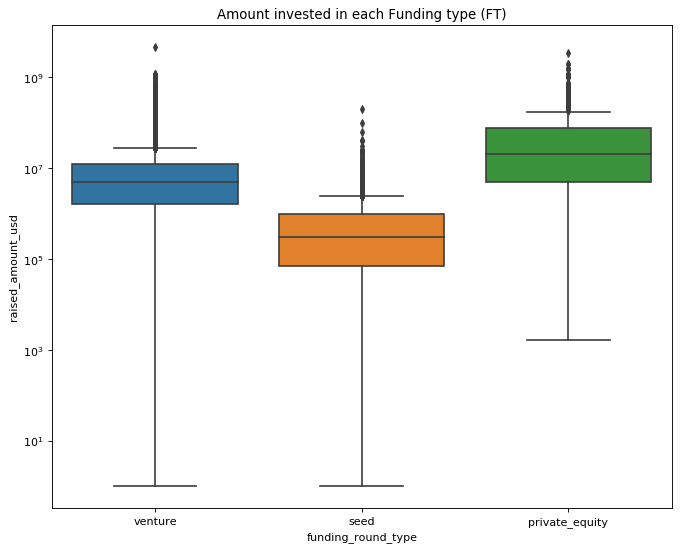

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

global_plot=master_frame[(master_frame['funding_round_type']=='venture') | (master_frame['funding_round_type']=='seed') |(master_frame['funding_round_type']=='private_equity')]
plt.figure(num=None, figsize=(10, 8), dpi=80)
plt.title("Amount invested in each Funding type (FT)")
global_plot = global_plot[(global_plot.raised_amount_usd<pow(10,10)) & (global_plot.raised_amount_usd>0)]
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=global_plot)
plt.yscale('log')
plt.show()

#### Plot 2:Top 9 countries against the total amount of investments of funding type FT

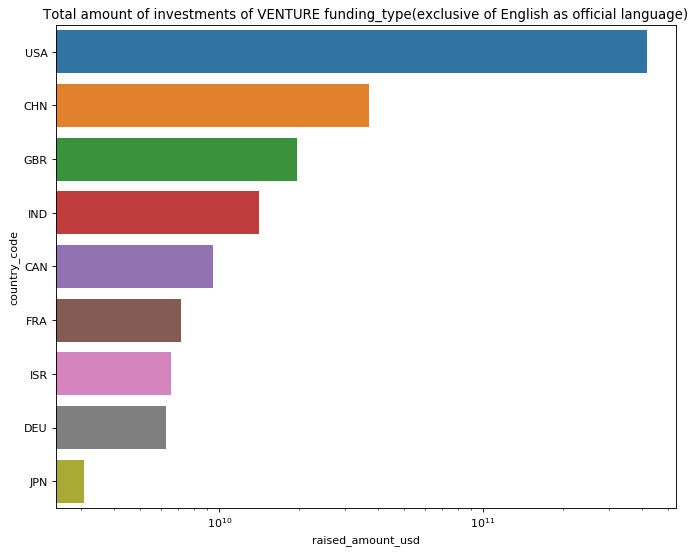

In [64]:
plt.figure(num=None, figsize=(10, 8), dpi=80)
plt.title("Total amount of investments of VENTURE funding_type(exclusive of English as official language)")
top9['country_code']=top9.index
sns.barplot(x='raised_amount_usd', y='country_code', data=top9)
plt.xscale('log')
plt.show()

#### Plot 3: Showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT)

C:\Users\ravkalla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ravkalla\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


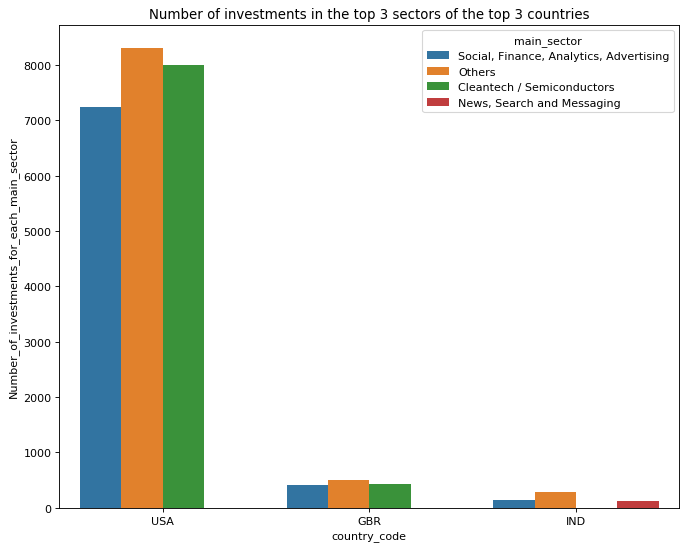

In [65]:
third_plot=master_frame[(master_frame.funding_round_type=='venture') & ((master_frame.country_code=='USA') | (master_frame.country_code=='GBR') | (master_frame.country_code=='IND'))]

#Function to get the total number (or count) of investments for each main sector in a separate column
#row.index[16] is main_sector
#row.index[10] is country_code
#topEng has USA,GBR and IND
def get_count_plot(row):
    a=np.arange(len(d1_count.head(3)))
    for i in a:
        if((row[row.index[16]]==d1_count.index[i]) & (row[row.index[10]]==topEng.index[0])):
            return d1_count.iloc[i]
    a=np.arange(len(d2_count.head(3)))
    for i in a:
        if((row[row.index[16]]==d2_count.index[i]) & (row[row.index[10]]==topEng.index[1])):
            return d2_count.iloc[i]
    a=np.arange(len(d3_count.head(3)))
    for i in a:
        if((row[row.index[16]]==d3_count.index[i]) & (row[row.index[10]]==topEng.index[2])):
            return d3_count.iloc[i]

#Applying get_count function to each row using apply fucntion
third_plot['Number_of_investments_for_each_main_sector']=third_plot.apply(get_count_plot,axis=1)
third_plot=third_plot[~np.isnan(third_plot['Number_of_investments_for_each_main_sector'])]


plt.figure(num=None, figsize=(10, 8), dpi=80)
plt.title("Number of investments in the top 3 sectors of the top 3 countries")
sns.barplot(x='country_code', y='Number_of_investments_for_each_main_sector',hue='main_sector', data=third_plot)
plt.show()